## 6.4 Machine Learning 

#### 1. Import libraries and data
#### 2. Data Cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1.Importing libraries and data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
path = r'C:\Users\13526\Documents\Airbnb Data Project'

In [8]:
df = pd.read_csv(os.path.join(path, '02 Data', 'airbnb_clean.csv'))

C:\Users\13526\AppData\Local\Temp\ipykernel_21884\2030327754.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, '02 Data', 'airbnb_clean.csv'))


### 2. Cleaning

In [9]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [10]:
df.head(20)

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville
1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville
2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville
3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville
4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville
5,5,209068,Terrace Cottage,1029919,NaN,28804,35.61856,-82.55276,Entire home/apt,134,7,54,2020-01-14,0.49,1,294,Asheville
6,6,213006,Blue Gate West,1098412,NaN,28806,35.58345,-82.59713,Private room,48,1,137,2019-11-30,1.35,1,0,Asheville
7,7,246315,Asheville Dreamer's Cabin,1292070,NaN,28805,35.59635,-82.50655,Private room,65,3,57,2019-10-30,0.53,2,106,Asheville
8,8,259576,"Private, peaceful, and free goat therapy",1362726,NaN,28805,35.61929,-82.48114,Entire home/apt,71,28,537,2020-05-04,5.01,1,207,Asheville
9,9,295496,The Fern Street Apt near Biltmore,1501882,NaN,28803,35.55537,-82.53539,Entire home/apt,50,90,31,2019-06-14,0.29,1,339,Asheville


In [11]:
df.shape

(225967, 17)

In [13]:
# checking for missing values
df.isnull().sum()

Unnamed: 0                             0
id                                     0
name                                  27
host_id                                0
neighbourhood_group               115814
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48587
reviews_per_month                  48587
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

In [14]:
dups = df.duplicated()

In [15]:
dups.shape

(225967,)

In [16]:
df['price'].median()

121.0

In [17]:
df['price'].max()

24999

### 3. Data prep for regression analysis

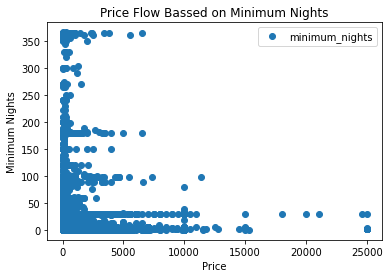

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'price', y='minimum_nights',style='o')
plt.title('Price Flow Bassed on Minimum Nights')
plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects

x = df['price'].values.reshape(-1,1)
y = df['minimum_nights'].values.reshape(-1,1)

In [20]:
x

array([[ 60],
       [470],
       [ 75],
       ...,
       [240],
       [ 60],
       [ 79]], dtype=int64)

In [21]:
y

array([[ 1],
       [ 1],
       [30],
       ...,
       [ 2],
       [21],
       [ 7]], dtype=int64)

In [22]:
# Split data into a training set and a test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [23]:
# Create a regression object

regression = LinearRegression()

In [24]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [26]:
regression.fit(x_train, y_train)

LinearRegression()

In [28]:
y_predicted = regression.predict(x_test)

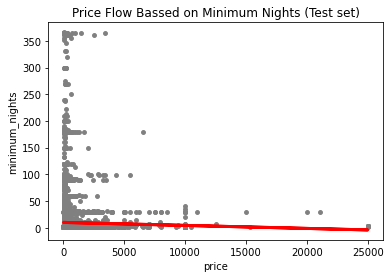

In [29]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price Flow Bassed on Minimum Nights (Test set)')
plot_test.xlabel('price')
plot_test.ylabel('minimum_nights')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [31]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00056205]]
Mean squared error:  453.48046690348224
R2 score:  0.00023118124511134486


In [32]:
y_predicted

array([[ 9.99284585],
       [ 9.97486015],
       [ 9.54601356],
       ...,
       [ 9.62807333],
       [10.02094851],
       [ 9.99284585]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,9.992846
1,2,9.974860
2,1,9.546014
3,30,9.964743
4,7,9.950692
5,2,9.787696
6,1,10.009707
7,30,9.866384
8,3,10.031065
9,30,10.009707


In [38]:
# Predict

y_predicted_train = regression.predict(x_train)

In [39]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [40]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00056205]]
Mean squared error:  448.0501940077678
R2 score:  0.0002213268030691884


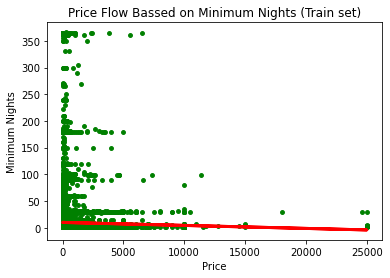

In [41]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price Flow Bassed on Minimum Nights (Train set)')
plot_test.xlabel('Price')
plot_test.ylabel('Minimum Nights')
plot_test.show()

The trend is very shallow and not very informative, but this would come in handy viewing a differe